/var/folders/s_/0k_dgz917s965l4ps21h8cpm0000gn/T/ipykernel_71002/3333525025.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraud Flag', data=transaction_data, palette='viridis')


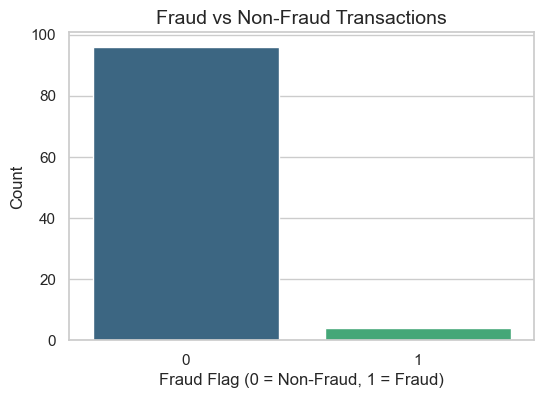

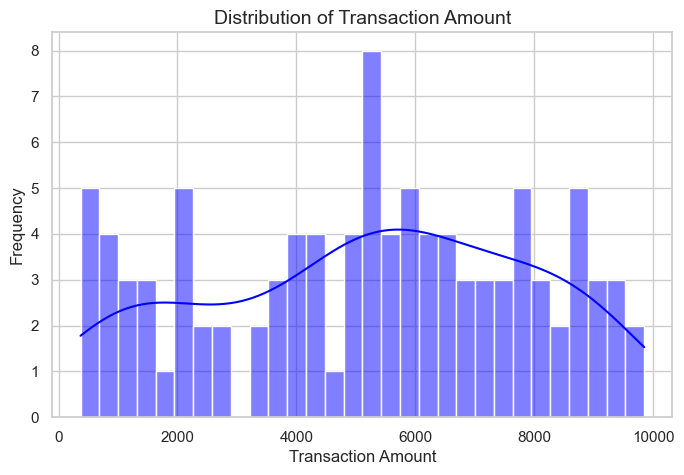

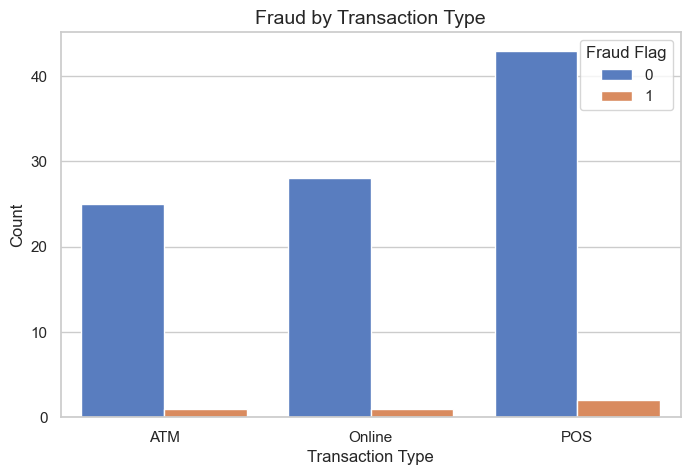

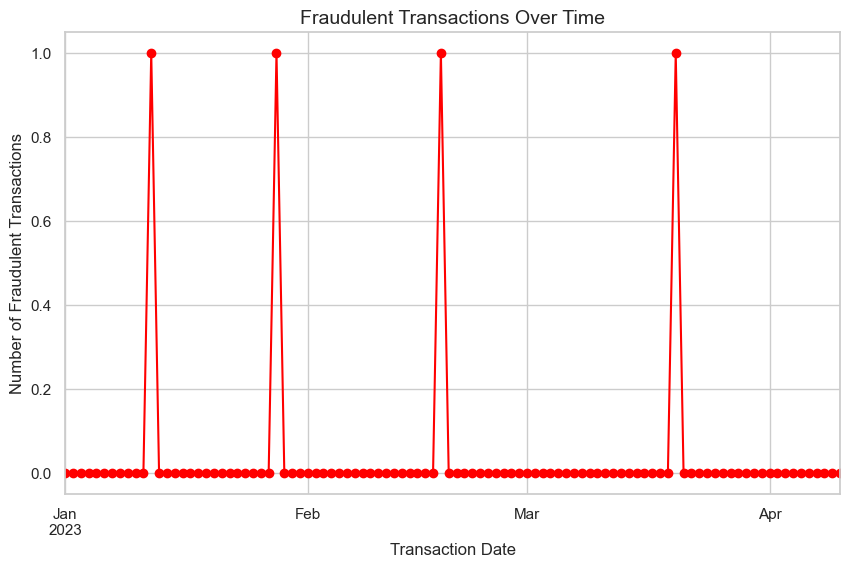

In [2]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset (update the file path as needed)
file_path = 'CS_2_3 transaction_data.csv'  
transaction_data = pd.read_csv(file_path)

# Convert Transaction Date to datetime format
transaction_data['Transaction Date'] = pd.to_datetime(transaction_data['Transaction Date'])

# Set visualization style
sns.set(style="whitegrid")

# Fraud distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Fraud Flag', data=transaction_data, palette='viridis')
plt.title("Fraud vs Non-Fraud Transactions", fontsize=14)
plt.xlabel("Fraud Flag (0 = Non-Fraud, 1 = Fraud)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Distribution of Transaction Amount
plt.figure(figsize=(8, 5))
sns.histplot(transaction_data['Transaction Amount'], bins=30, kde=True, color='blue')
plt.title("Distribution of Transaction Amount", fontsize=14)
plt.xlabel("Transaction Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Fraud by Transaction Type
plt.figure(figsize=(8, 5))
sns.countplot(x='Transaction Type', hue='Fraud Flag', data=transaction_data, palette='muted')
plt.title("Fraud by Transaction Type", fontsize=14)
plt.xlabel("Transaction Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Temporal Trends: Fraud over Time
plt.figure(figsize=(10, 6))
fraud_over_time = transaction_data.groupby('Transaction Date')['Fraud Flag'].sum()
fraud_over_time.plot(kind='line', marker='o', color='red')
plt.title("Fraudulent Transactions Over Time", fontsize=14)
plt.xlabel("Transaction Date", fontsize=12)
plt.ylabel("Number of Fraudulent Transactions", fontsize=12)
plt.show()


In [6]:
import pandas as pd
import numpy as np

# Load datasets
transaction_data = pd.read_csv('CS_2_3 transaction_data.csv')
customer_profile = pd.read_csv('CS_2_3 customer_profile.csv')
credit_history = pd.read_csv('CS_2_3 credit_history.csv')
account_activity = pd.read_csv('CS_2_3 account_activity.csv')

# Convert Transaction Date to datetime
transaction_data['Transaction Date'] = pd.to_datetime(transaction_data['Transaction Date'])

# =========================
# Merge Datasets
# =========================
# Merging transaction data with customer profile
merged_data = transaction_data.merge(customer_profile, on='Customer ID', how='left')

# Merging with credit history
merged_data = merged_data.merge(credit_history, on='Customer ID', how='left')

# Merging with account activity
merged_data = merged_data.merge(account_activity, on='Customer ID', how='left')

# =========================
# Feature Engineering
# =========================

# 1. Features from transaction data
merged_data['Customer Transaction Count'] = merged_data.groupby('Customer ID')['Transaction ID'].transform('count')
merged_data['Average Transaction Amount'] = merged_data.groupby('Customer ID')['Transaction Amount'].transform('mean')

threshold = merged_data['Transaction Amount'].quantile(0.95)
merged_data['High Transaction Flag'] = np.where(merged_data['Transaction Amount'] > threshold, 1, 0)

merged_data['Is Off-Hours Transaction'] = np.where(
    (merged_data['Transaction Date'].dt.hour < 9) | (merged_data['Transaction Date'].dt.hour > 21), 1, 0
)

merged_data['Registered Location'] = 'Los Angeles'  # Replace if real data is available
merged_data['Is Unusual Location'] = np.where(
    merged_data['Transaction Location'] != merged_data['Registered Location'], 1, 0
)

merged_data['Transaction Timestamp'] = merged_data['Transaction Date'].astype(np.int64) // 10**9
merged_data['Time Since Last Transaction'] = merged_data.groupby('Customer ID')['Transaction Timestamp'].diff().fillna(0)

# 2. Features from customer profile
merged_data['Age Group'] = pd.cut(merged_data['Age'], bins=[0, 25, 45, 65, 100], labels=['Youth', 'Adult', 'Middle-Aged', 'Senior'])
merged_data['High Income Flag'] = np.where(merged_data['Annual Income'] > merged_data['Annual Income'].median(), 1, 0)

# 3. Features from credit history
merged_data['Has Good Credit'] = np.where(merged_data['Credit Score'] > 700, 1, 0)
merged_data['Open Account Ratio'] = merged_data['Number of Open Accounts'] / merged_data['Account Tenure']

# 4. Features from account activity
merged_data['Login Frequency'] = merged_data.groupby('Customer ID')['Last Login Time'].transform('count')
merged_data['Frequent Failed Logins'] = np.where(merged_data['Failed Login Attempts'] > 3, 1, 0)

# Drop helper columns that are no longer needed
merged_data.drop(columns=['Transaction Timestamp'], inplace=True)

# Display the final feature-engineered dataset
merged_data.head()


,Transaction ID,Customer ID,Transaction Amount,Transaction Type,Transaction Date,Merchant ID,Transaction Location,Fraud Flag,Age,Gender,...,Is Off-Hours Transaction,Registered Location,Is Unusual Location,Time Since Last Transaction,Age Group,High Income Flag,Has Good Credit,Open Account Ratio,Login Frequency,Frequent Failed Logins
0,TXN00001,CUST001,6792.01,ATM,2023-01-01,MER0001,Los Angeles,0,47,Male,...,1,Los Angeles,0,0.0,Middle-Aged,1,1,0.500000,1,0
1,TXN00002,CUST002,2723.21,Online,2023-01-02,MER0002,New York,0,40,Male,...,1,Los Angeles,1,0.0,Adult,1,0,0.727273,1,0
2,TXN00003,CUST003,7097.81,ATM,2023-01-03,MER0003,New York,0,53,Male,...,1,Los Angeles,1,0.0,Middle-Aged,1,1,0.166667,1,0
3,TXN00004,CUST004,1015.66,POS,2023-01-04,MER0004,Phoenix,0,30,Female,...,1,Los Angeles,1,0.0,Adult,0,0,0.666667,1,0
4,TXN00005,CUST005,6516.23,POS,2023-01-05,MER0005,Los Angeles,0,52,Female,...,1,Los Angeles,0,0.0,Middle-Aged,1,0,2.000000,1,0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  # Install with `pip install imbalanced-learn`

# =========================
# Data Preparation
# =========================
# Selecting features for the model
features = [
    'Transaction Amount', 'Customer Transaction Count', 'Average Transaction Amount', 
    'High Transaction Flag', 'Is Off-Hours Transaction', 'Is Unusual Location',
    'Age', 'Annual Income', 'Account Tenure', 'Credit Score', 'Open Account Ratio', 
    'Has Good Credit', 'Login Frequency', 'Frequent Failed Logins'
]

# Target variable
target = 'Fraud Flag'

# Prepare the feature matrix (X) and target vector (y)
X = merged_data[features]
y = merged_data[target]

# Scale numeric features for better performance (optional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Check class distribution in y_train
print("Class Distribution in Training Set:")
print(y_train.value_counts())

# =========================
# Handle Class Imbalance
# =========================
# Apply SMOTE for balancing classes in training set
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Class Distribution After SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

# =========================
# Model Training
# =========================
# Using Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# =========================
# Model Evaluation
# =========================
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# Check if AUC-ROC can be calculated
if len(y_test.unique()) > 1:
    auc_roc = roc_auc_score(y_test, y_pred_proba)
else:
    auc_roc = None

# Print classification metrics
print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
if auc_roc is not None:
    print(f"AUC-ROC: {auc_roc:.2f}")
else:
    print("AUC-ROC: Not defined (only one class present in y_test).")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# =========================
# Transactions Most Likely to be Fraudulent
# =========================
# Add prediction probabilities to the test dataset
test_results = merged_data.iloc[y_test.index].copy()
test_results['Fraud Probability'] = y_pred_proba

# Identify top suspicious transactions
high_risk_transactions = test_results.sort_values(by='Fraud Probability', ascending=False).head(10)
print("\nTop Transactions Most Likely to be Fraudulent:")
print(high_risk_transactions[['Transaction ID', 'Fraud Probability', 'Customer ID', 'Transaction Amount']])


Class Distribution in Training Set:
Fraud Flag
0    66
1     4
Name: count, dtype: int64
Class Distribution After SMOTE:
Fraud Flag
1    66
0    66
Name: count, dtype: int64
Model Performance Metrics:
Accuracy: 1.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
AUC-ROC: Not defined (only one class present in y_test).

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Top Transactions Most Likely to be Fraudulent:
   Transaction ID  Fraud Probability Customer ID  Transaction Amount
0        TXN00001               0.22     CUST001             6792.01
69       TXN00070               0.21     CUST070             5738.23
90       TXN00091               0.17     CUST091             6095.07
26       TXN00027               0.15     CUST027             6

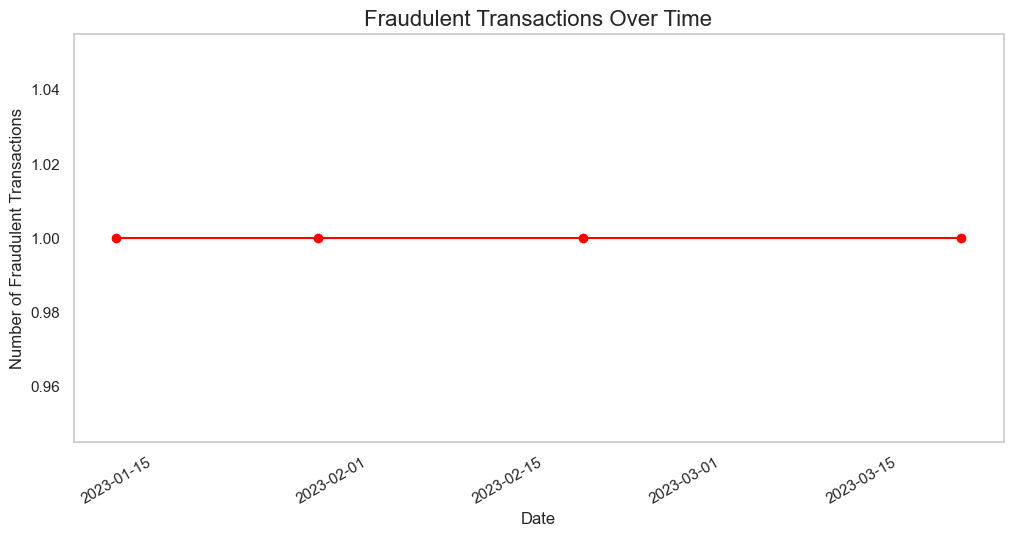

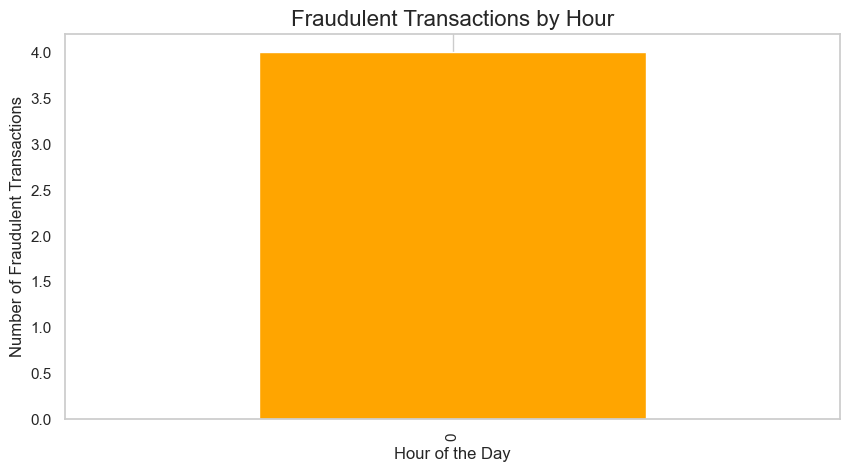

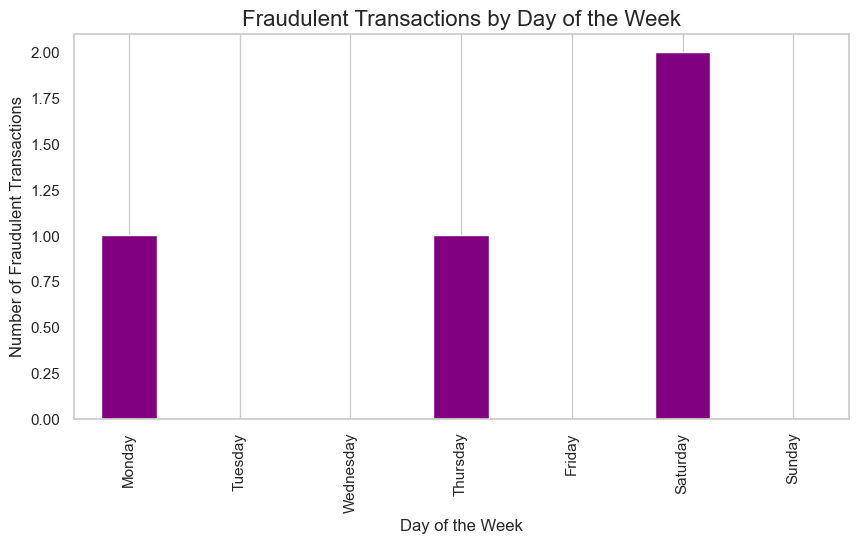

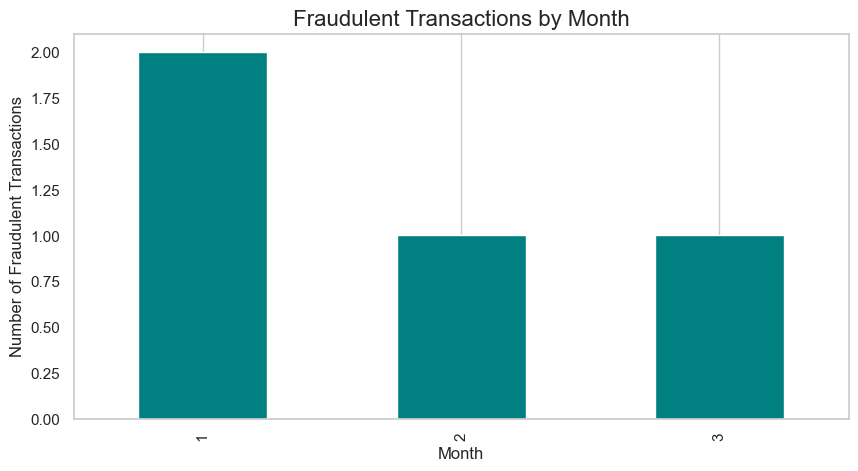

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# Fraud Trends Over Time
# =========================
# Convert Transaction Date to datetime (if not already done)
merged_data['Transaction Date'] = pd.to_datetime(merged_data['Transaction Date'])

# Aggregate fraud counts by date
fraud_trends = merged_data[merged_data['Fraud Flag'] == 1].groupby('Transaction Date').size()

# Plot fraud trends over time
plt.figure(figsize=(12, 6))
fraud_trends.plot(kind='line', marker='o', color='red')
plt.title("Fraudulent Transactions Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Fraudulent Transactions", fontsize=12)
plt.grid()
plt.show()

# =========================
# Fraud by Time of Day
# =========================
# Extract hour from transaction time
merged_data['Transaction Hour'] = merged_data['Transaction Date'].dt.hour

# Aggregate fraud counts by hour
fraud_by_hour = merged_data[merged_data['Fraud Flag'] == 1].groupby('Transaction Hour').size()

# Plot fraud by time of day
plt.figure(figsize=(10, 5))
fraud_by_hour.plot(kind='bar', color='orange')
plt.title("Fraudulent Transactions by Hour", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Fraudulent Transactions", fontsize=12)
plt.grid(axis='y')
plt.show()

# =========================
# Fraud by Day of Week
# =========================
# Extract day of the week
merged_data['Day of Week'] = merged_data['Transaction Date'].dt.day_name()

# Aggregate fraud counts by day of week
fraud_by_day = merged_data[merged_data['Fraud Flag'] == 1].groupby('Day of Week').size()

# Sort the days for proper display
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fraud_by_day = fraud_by_day.reindex(day_order)

# Plot fraud by day of week
plt.figure(figsize=(10, 5))
fraud_by_day.plot(kind='bar', color='purple')
plt.title("Fraudulent Transactions by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Fraudulent Transactions", fontsize=12)
plt.grid(axis='y')
plt.show()

# =========================
# Seasonal Trends
# =========================
# Extract month from transaction date
merged_data['Transaction Month'] = merged_data['Transaction Date'].dt.month

# Aggregate fraud counts by month
fraud_by_month = merged_data[merged_data['Fraud Flag'] == 1].groupby('Transaction Month').size()

# Plot fraud by month
plt.figure(figsize=(10, 5))
fraud_by_month.plot(kind='bar', color='teal')
plt.title("Fraudulent Transactions by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Fraudulent Transactions", fontsize=12)
plt.grid(axis='y')
plt.show()


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 108 kB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 85 kB 3.7 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


/Users/sakshamsharma/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/var/folders/s_/0k_dgz917s965l4ps21h8cpm0000gn/T/ipykernel_71002/593478938.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_data['Coordinates'] = fraud_data['Transaction Location'].map(location_mapping)


Heatmap saved as fraud_heatmap.html


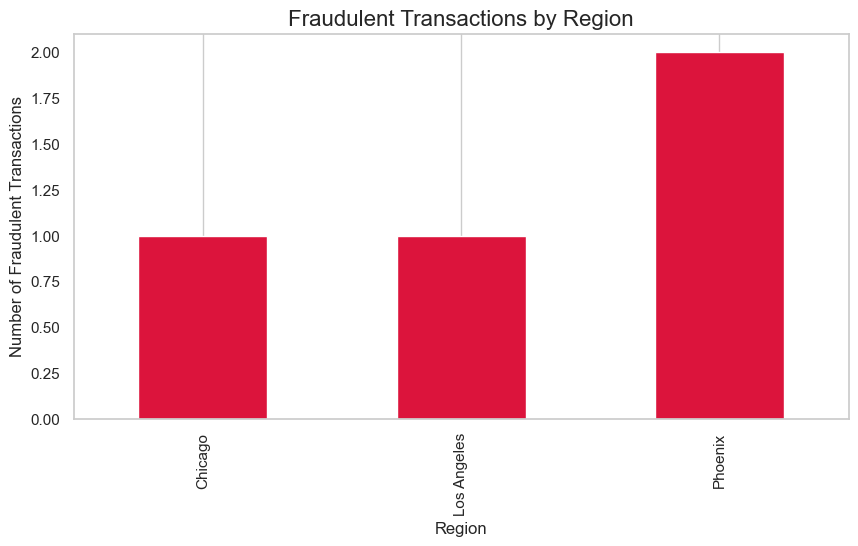

In [12]:
%pip install folium
import folium
from folium.plugins import HeatMap

# =========================
# Mapping Fraud Hotspots
# =========================
# Filter fraud transactions
fraud_data = merged_data[merged_data['Fraud Flag'] == 1]

# Placeholder: Convert Transaction Location to latitude and longitude
# If latitude/longitude data is unavailable, assume approximate coordinates for demo.
location_mapping = {
    'Los Angeles': (34.0522, -118.2437),
    'New York': (40.7128, -74.0060),
    'Phoenix': (33.4484, -112.0740)
}

# Map transaction locations to coordinates
fraud_data['Coordinates'] = fraud_data['Transaction Location'].map(location_mapping)

# Create a map centered on a general area
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)  # Centered on the US

# Add fraud transaction locations as a heatmap
heatmap_data = fraud_data['Coordinates'].dropna().apply(lambda x: [x[0], x[1]])
HeatMap(heatmap_data.tolist()).add_to(m)

# Display map
m.save("fraud_heatmap.html")
print("Heatmap saved as fraud_heatmap.html")

# =========================
# Fraud Rates by Region
# =========================
# Aggregate fraud counts by location
fraud_by_location = fraud_data.groupby('Transaction Location').size()

# Compare fraud counts across regions
plt.figure(figsize=(10, 5))
fraud_by_location.plot(kind='bar', color='crimson')
plt.title("Fraudulent Transactions by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Fraudulent Transactions", fontsize=12)
plt.grid(axis='y')
plt.show()


In [13]:
# Summary of transaction data
transaction_summary = merged_data.describe()

# Fraud distribution
fraud_distribution = merged_data['Fraud Flag'].value_counts(normalize=True)

# Customer profile trends
age_summary = merged_data['Age'].describe()
income_summary = merged_data['Annual Income'].describe()

# Credit history summary
credit_score_summary = merged_data['Credit Score'].describe()

# Display the summary information
print("Transaction Data Summary:")
print(transaction_summary)
print("\nFraud Distribution (0: Non-Fraud, 1: Fraud):")
print(fraud_distribution)
print("\nCustomer Profile Summary:")
print(f"Age Summary:\n{age_summary}")
print(f"Income Summary:\n{income_summary}")
print("\nCredit History Summary:")
print(f"Credit Score Summary:\n{credit_score_summary}")


Transaction Data Summary:
       Transaction Amount     Transaction Date  Fraud Flag         Age  \
count          100.000000                  100  100.000000  100.000000   
mean          5198.572600  2023-02-19 12:00:00    0.040000   41.740000   
min            370.230000  2023-01-01 00:00:00    0.000000   18.000000   
25%           3157.110000  2023-01-25 18:00:00    0.000000   29.000000   
50%           5338.480000  2023-02-19 12:00:00    0.000000   40.000000   
75%           7458.897500  2023-03-16 06:00:00    0.000000   53.500000   
max           9848.370000  2023-04-10 00:00:00    1.000000   69.000000   
std           2703.445542                  NaN    0.196946   15.628012   

       Annual Income  Account Tenure  Credit Score  Number of Open Accounts  \
count     100.000000      100.000000    100.000000               100.000000   
mean    84316.720000        7.540000    549.840000                 5.330000   
min     30015.000000        1.000000    313.000000                 1.0

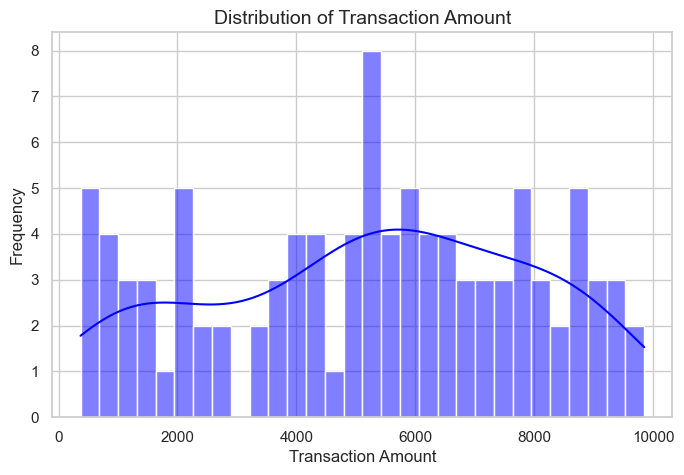

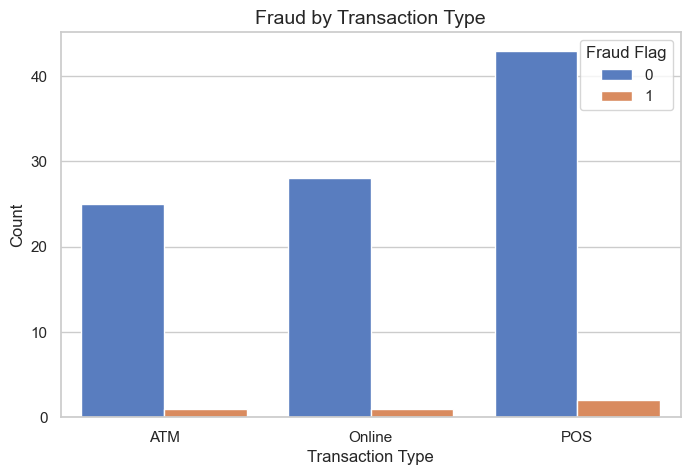

/var/folders/s_/0k_dgz917s965l4ps21h8cpm0000gn/T/ipykernel_71002/2842678424.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fraud Flag', y='Age', data=merged_data, palette='Set2')


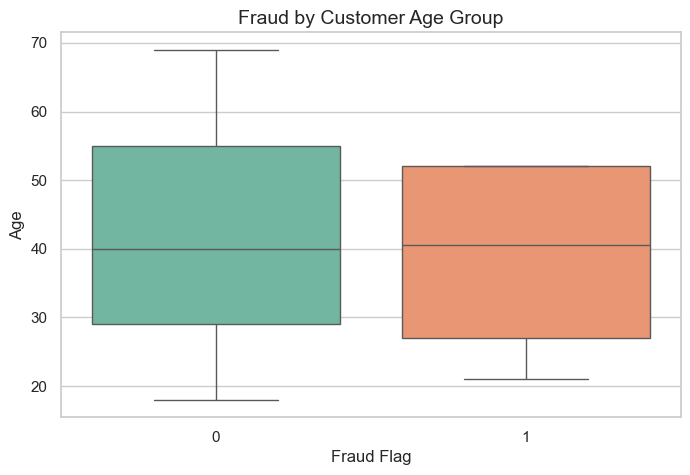

/var/folders/s_/0k_dgz917s965l4ps21h8cpm0000gn/T/ipykernel_71002/2842678424.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fraud Flag', y='Credit Score', data=merged_data, palette='coolwarm')


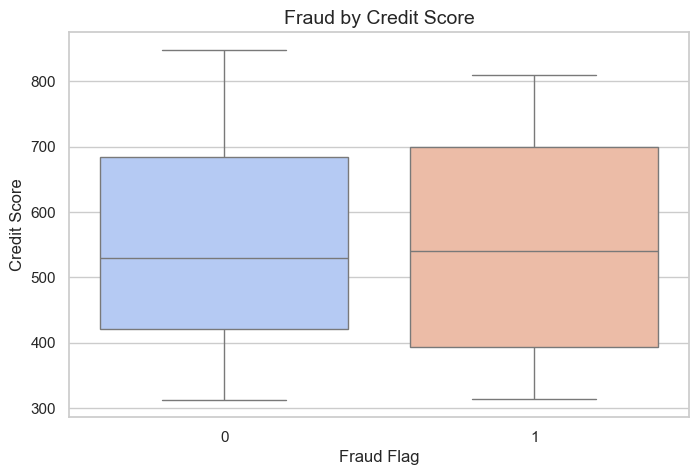

In [14]:
# Distribution of Transaction Amount
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['Transaction Amount'], bins=30, kde=True, color='blue')
plt.title("Distribution of Transaction Amount", fontsize=14)
plt.xlabel("Transaction Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Fraud by Transaction Type
plt.figure(figsize=(8, 5))
sns.countplot(x='Transaction Type', hue='Fraud Flag', data=merged_data, palette='muted')
plt.title("Fraud by Transaction Type", fontsize=14)
plt.xlabel("Transaction Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Fraud by Customer Age Group
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fraud Flag', y='Age', data=merged_data, palette='Set2')
plt.title("Fraud by Customer Age Group", fontsize=14)
plt.xlabel("Fraud Flag", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.show()

# Fraud by Credit Score
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fraud Flag', y='Credit Score', data=merged_data, palette='coolwarm')
plt.title("Fraud by Credit Score", fontsize=14)
plt.xlabel("Fraud Flag", fontsize=12)
plt.ylabel("Credit Score", fontsize=12)
plt.show()

# Geospatial Hotspot (fraud map already provided in earlier code)


In [17]:
# Using Random Forest Classifier (as previously defined)
from sklearn.metrics import classification_report

# Train the model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Check if AUC-ROC can be calculated
if len(y_test.unique()) > 1:
    auc_roc = roc_auc_score(y_test, y_pred_proba)
else:
    auc_roc = None

# Print classification metrics
if auc_roc is not None:
    print(f"AUC-ROC: {auc_roc:.2f}")
else:
    print("AUC-ROC: Not defined (only one class present in y_test).")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print("\nTop Predictive Features:")
print(feature_importance_df)

# Top Fraudulent Transactions
test_results = merged_data.iloc[y_test.index].copy()
test_results['Fraud Probability'] = y_pred_proba
high_risk_transactions = test_results.sort_values(by='Fraud Probability', ascending=False).head(10)
print("\nTop Transactions Most Likely to be Fraudulent:")
print(high_risk_transactions[['Transaction ID', 'Fraud Probability', 'Customer ID', 'Transaction Amount']])


AUC-ROC: Not defined (only one class present in y_test).
Accuracy: 1.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Top Predictive Features:
                       Feature  Importance
13      Frequent Failed Logins    0.350973
8               Account Tenure    0.179103
10          Open Account Ratio    0.117232
7                Annual Income    0.075099
0           Transaction Amount    0.065247
2   Average Transaction Amount    0.058478
6                          Age    0.048071
11             Has Good Credit    0.035936
9                 Credit Score    0.025202
5          Is Unusual Location    0.023202
3        High Transaction Flag    0.021458
1   Customer Transaction Count    0.000000
4 

/Users/sakshamsharma/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sakshamsharma/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sakshamsharma/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))